In [19]:
import math
import matplotlib.pyplot as plt

## Created functions

In [15]:
def temp_health_penalty(temp):
    if 3 <= temp <= 5:
        return 0
    return abs(temp - 4)**2 * 0.05

def salinity_health_penalty(salinity):
    sigma = 1.5
    return 1 - math.exp(-((salinity - 34)**2) / (2 * sigma**2))

def depth_health_penalty(depth):
    if 50 <= depth <= 200:
        return 0
    return abs(depth - 125) / 100

In [16]:
def daily_health_penalty(temp, salinity, depth):
    """
    Calculates total daily health penalty based on environmental conditions.
    """
    temp_penalty = temp_health_penalty(temp)
    sal_penalty = salinity_health_penalty(salinity)
    depth_penalty = depth_health_penalty(depth)

    return temp_penalty + sal_penalty + depth_penalty


## Create the Sea Slug class

In [14]:
class SeaSlug:
    def __init__(self):
        self.age = 0
        self.health = 100.0
        self.energy = 100.0
        self.reproductive_success = 0
        self.alive = True
    def step(self, temp, salinity, depth):
        if not self.alive:
            return

        penalty = daily_health_penalty(temp, salinity, depth)
        self.health -= penalty
        self.energy -= 1  # Daily maintenance cost

        # Reproduction logic placeholder
        if self.energy > 90 and self.health > 80:
            self.reproductive_success += 0.1

        self.age += 1

        if self.age > 3650 or self.health <= 0 or self.energy <= 0:
            self.alive = False


## Simulate

In [17]:
slugs = [SeaSlug() for _ in range(1000)]

for day in range(365 * 10):  # 10 years
    for slug in slugs:
        slug.step(temp=4.0, salinity=34.0, depth=100)

# After simulation: analyze output
lifespans = [slug.age for slug in slugs]
repro_rates = [slug.reproductive_success for slug in slugs]


In [18]:
print("Average lifespan:", sum(lifespans)/len(slugs))
print("Average reproduction:", sum(repro_rates)/len(slugs))


Average lifespan: 100.0
Average reproduction: 0.8999999999999999


## Visualisation

In [20]:
lifespans = [slug.age for slug in slugs]

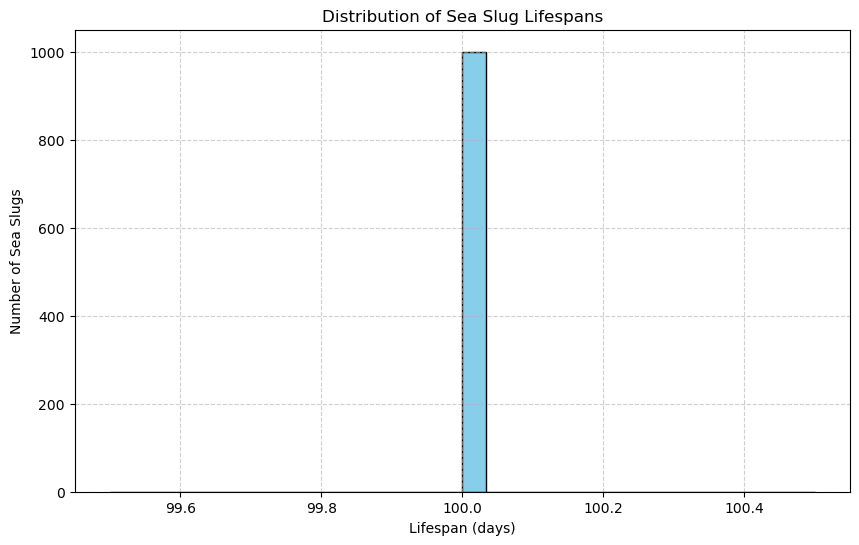

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(lifespans, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sea Slug Lifespans")
plt.xlabel("Lifespan (days)")
plt.ylabel("Number of Sea Slugs")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()